In [79]:
# Load necessary packages 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, ensemble
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import pickle
import pprint
import sklearn.impute as sk


# Load data
data_train = pd.read_csv("train.csv", sep =",")
data_test = pd.read_csv("test.csv", sep = ",")


# Calculate mean and standard deviation of SalePrice in data_train
SalePrice_mean = data_train['SalePrice'].mean()
SalePrice_std = data_train['SalePrice'].std()

print("Mean of SalePrice in data_train: ", SalePrice_mean)
print("Standard deviation of SalePrice in data_train: ", SalePrice_std)


# Extract Id column
test_ids = data_test['Id']

# Drop the 'Id' column we wont need for the prediction process.
data_train.drop("Id", axis = 1, inplace = True)
data_test.drop("Id", axis = 1, inplace = True)


# Split data_train into X and y
y = data_train['SalePrice']
y = pd.DataFrame(y)
data_train.drop('SalePrice', axis=1, inplace = True)


X = data_train 

print(X)
print(y)

Mean of SalePrice in data_train:  180921.19589041095
Standard deviation of SalePrice in data_train:  79442.50288288663
      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

    

In [80]:
from sklearn.preprocessing import StandardScaler


#scaler = StandardScaler()
y = np.log1p(y)
print(y)


      SalePrice
0     12.247699
1     12.109016
2     12.317171
3     11.849405
4     12.429220
...         ...
1455  12.072547
1456  12.254868
1457  12.493133
1458  11.864469
1459  11.901590

[1460 rows x 1 columns]


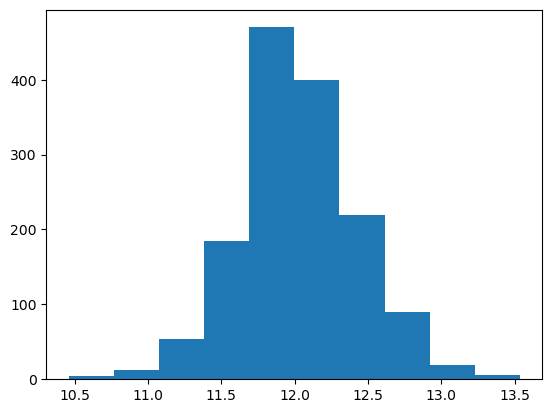

In [81]:
plt.hist(y)
plt.show()


In [83]:
# Define imputers for categorical and numerical features
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(exclude='object').columns.tolist()

categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='mean')

# Categorical cleaning 
X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])
data_test[categorical_cols] = categorical_imputer.transform(data_test[categorical_cols])

# Numerical Cleaning
X[numerical_cols] = numerical_imputer.fit_transform(X[numerical_cols])
data_test[numerical_cols] = numerical_imputer.transform(data_test[numerical_cols])

# Perform one-hot encoding on categorical columns
X_encoded = pd.get_dummies(X)
data_test_encoded = pd.get_dummies(data_test)

# Reindex the test set to have the same column order as the training set
data_test_encoded = data_test_encoded.reindex(columns=X_encoded.columns, fill_value=0)


In [84]:
#Check number of columns
print("Number of columns in X_train_encoded:", X_encoded.shape[1])
print("Number of columns in data_test_encoded:", data_test_encoded.shape[1])


Number of columns in X_train_encoded: 288
Number of columns in data_test_encoded: 288


In [98]:
# Define and train the model
model = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, loss='ls')
model.fit(X_encoded, y)


# Evaluate the model on the validation set
y_val_pred = model.predict(X_encoded)
mse = mean_squared_error(y, y_val_pred)
print("MSE on validation set:", mse)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val_pred, y))
print("RMSE on validation set:", rmse)


#Find how best model fits the data quantitatively. sklearn
print(model.score(X_encoded, y))

#max_depth =3 , score of 96% 
#max_depth = 5 , score of 99%

# Make predictions on the test set
test_pred = model.predict(data_test_encoded)


# Make predictions on the validation set
y_val_pred = model.predict(X_encoded)


/Users/hiuhiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hiuhiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


MSE on validation set: 0.006633476626357569
RMSE on validation set: 0.08144615783668109
0.9583978767564233


In [101]:

SalePrice = np.floor(np.expm1(test_pred))

In [102]:
# Print the root mean squared error (RMSE)
print("RMSE on validation set: ", rmse)

# Combine the predicted SalePrice with the test IDs
output = pd.DataFrame({'Id': test_ids, 'SalePrice': SalePrice})
# Save to csv file 
output.to_csv('submission_April_7_ver4.csv', index=False)

RMSE on validation set:  0.08144615783668109


In [ ]:
# Save encoded data to CSV files
X_train_encoded.to_csv('X_train_encoded.csv', index=False)
y_train.to_csv('y_train.csv', index=False, header=True)
X_test_encoded.to_csv('X_test_encoded.csv', index=False)
